In [1]:
from model import *
from linares_plot import * 
from scipy.stats import norm

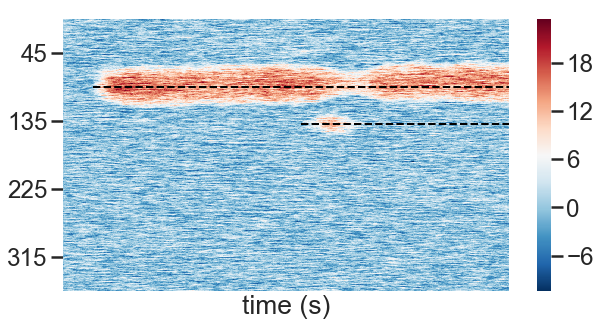

In [7]:
# 1st off
fee=1
fei=1
fie=1
fii=1

## Example
an = model(totalTime=1500, targ_onset_1=100, targ_onset_2=800, angle_target_i=90, presentation_period=100,
           angle_separation=49, tauE=20, tauI=10,  n_stims=2, I0E=0.1, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5., 
           kappa_E=45, 
           kappa_I=0.5, 
           kappa_stim=40., N=512, stim_strengthE=9.20, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=True , plot_fit=False) 

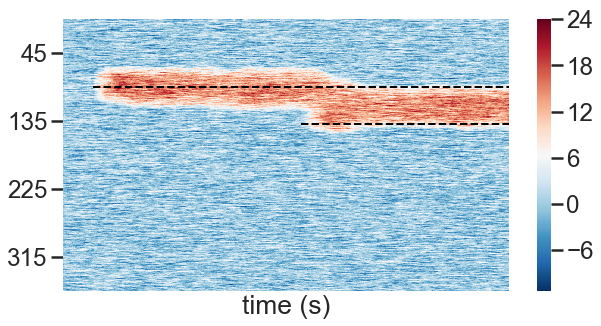

In [6]:
# 1st ON

fee=1
fei=1
fie=1
fii=1

## Example
an = model(totalTime=1500, targ_onset_1=100, targ_onset_2=800, angle_target_i=90, presentation_period=100,
           angle_separation=49, tauE=20, tauI=10,  n_stims=2, I0E=0.5, I0I=0.5, 
           GEE=0.068*fee,
           GII= 0.13*fei,
           GEI=0.13*fie,
           GIE=0.042*fii, 
           sigE=10., sigI=5., 
           kappa_E=45, 
           kappa_I=0.5, 
           kappa_stim=40., N=512, stim_strengthE=9.20, stim_strengthI=0.,
           plot_connectivity=False, plot_rate=False, plot_hm=True , plot_fit=False) 